# Центральная предельная теорема и статистический анализ данных в Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?

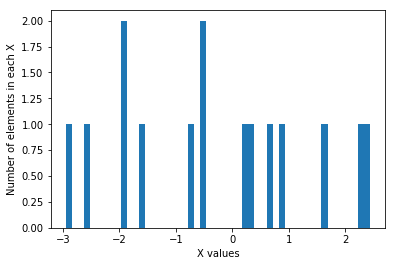

In [4]:
number_of_sums = 15 # найти количество
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
    X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Чему равна матрица ковариаций для графика?

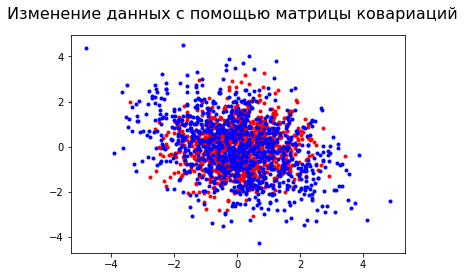

In [5]:
import numpy.linalg as la
n = 1000
C = [[2,-0.75],[-0.75,2]] # найти
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

In [6]:
# Матрицу ковариации определила исходя из изменения масштаба и угла поворота.

In [7]:
np.cov(Y[0,:], Y[1,:])

array([[ 2.04038036, -0.70728378],
       [-0.70728378,  1.85748486]])

In [8]:
np.cov(X[:,0], X[:,1])

array([[1.02019018, 0.03120674],
       [0.03120674, 0.93902575]])

Построить преобразование с помощью вычисленной выше матрицей

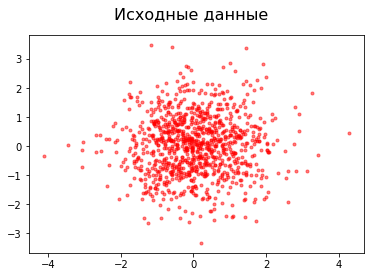

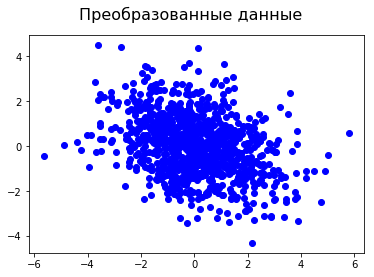

In [9]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2,-0.8],[-0.8, 2]]      # найти
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [10]:
theta = (45+90)*math.pi/180    # найти
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)    # найти
var_theoretical = np.transpose(u)*c*u  # найти
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  2.827048084709141
теоритический подсчет:  [[2.8]]


При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [11]:
var_theoretical-var_empirical

matrix([[-0.02704808]])

In [12]:
# Так как разница между теоретическим и практическим разбросом данных небольшая, 
# то значит мы сгенерировали достаточное коичество данных 

Посчитать как меняется вариация в зависимости от выбора собственного вектора

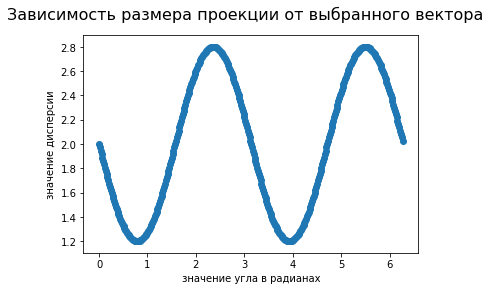

In [13]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

In [14]:
# Максимальный разброс при угле примерно 2.5 радианы или 143 градуса

In [15]:

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [16]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [1]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

NameError: name 'df' is not defined

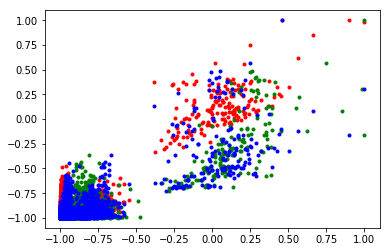

In [18]:
avo_4046 = df_norm[0]
avo_4225 = df_norm[1]
avo_4770 = df_norm[2]
plt.plot(avo_4046, avo_4225, 'r.')
plt.plot(avo_4225, avo_4770, 'g.')
plt.plot(avo_4046, avo_4770, 'b.')

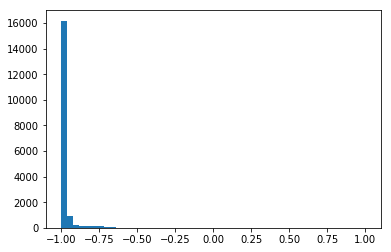

In [19]:
plt.hist(avo_4046,50)
plt.show()

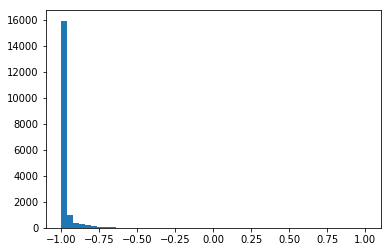

In [20]:
plt.hist(avo_4225,50)
plt.show()

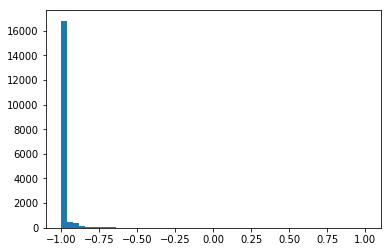

In [21]:
plt.hist(avo_4770,50)
plt.show()

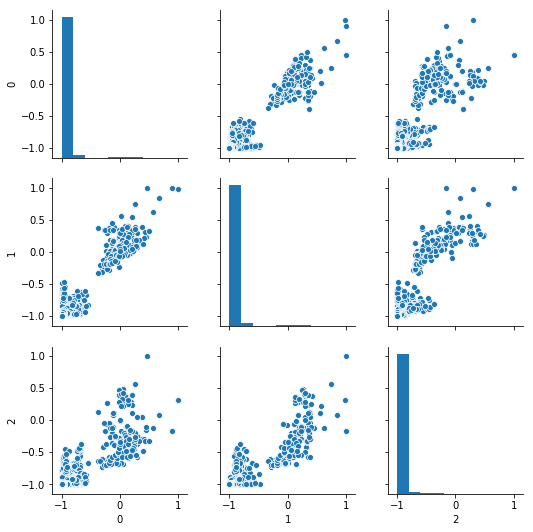

In [22]:
import seaborn as sns
sns.pairplot(df_norm)

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [23]:

# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

In [24]:
# считаем матрицу ковариаций для вектора X1
X1 = np.vstack((avo_4046, avo_4225))
cov_mat(X1.T)

array([[1.36719418e-05, 1.12478035e-05],
       [1.12478035e-05, 9.25348315e-06]])

In [25]:
# считаем матрицу ковариаций для вектора X2
X2 = np.vstack((avo_4225, avo_4770))
cov_mat(X2.T)

array([[1.39522982e-05, 1.13981484e-05],
       [1.13981484e-05, 9.31156894e-06]])

In [26]:
# считаем матрицу ковариаций для вектора X3
X3 = np.vstack((avo_4046, avo_4770))
cov_mat(X3.T)

array([[1.42269467e-09, 3.59553221e-10],
       [3.59553221e-10, 9.08687732e-11]])

2.2925424937466838e-05 [0.77224731 0.63532204]


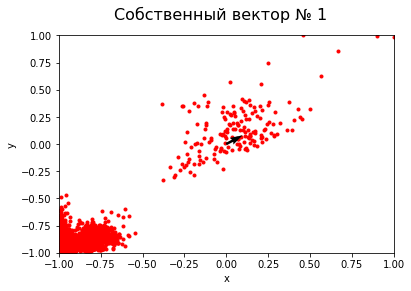

0.0 [-0.63532204  0.77224731]


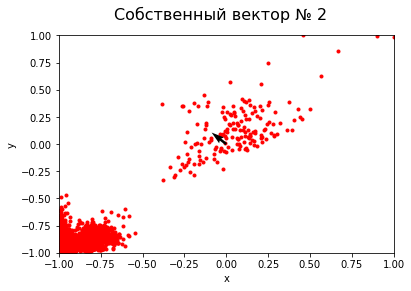

In [27]:
#собственный вектор для avo_4046 и avo_4225
import numpy.linalg as la
n=1000
Cb = cov_mat(X1.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X1[0,:], X1[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

2.326386709444647e-05 [0.77442956 0.63266015]


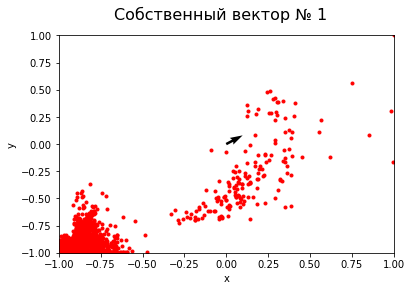

-1.6940658945086007e-21 [-0.63266015  0.77442956]


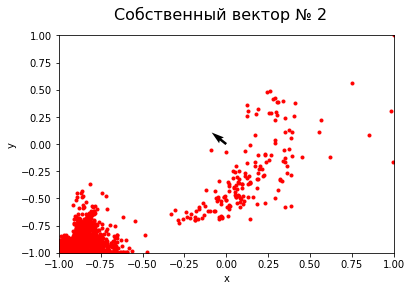

In [28]:
#собственный вектор для avo_4225 и avo_4770
import numpy.linalg as la
n=1000
Cb = cov_mat(X2.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X2[0,:], X2[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

1.5135634411966643e-09 [0.96951724 0.24502309]


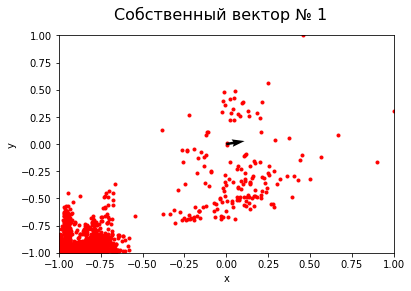

-2.5849394142282115e-26 [-0.24502309  0.96951724]


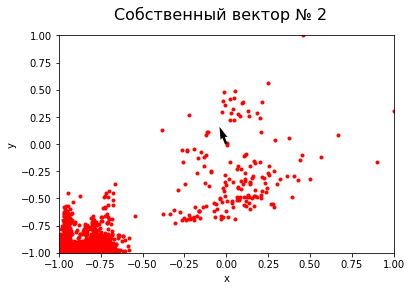

In [29]:
#собственный вектор для avo_4046 и avo_4770
import numpy.linalg as la
n=1000
Cb = cov_mat(X3.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X3[0,:], X3[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

На какую прямую проецируем?

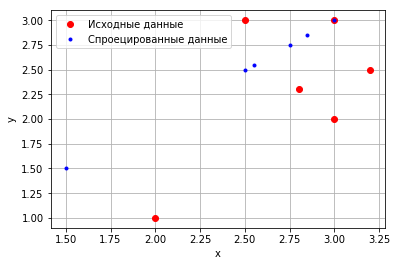

In [30]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[0.5,0.5],[0.5,0.5]]) # проецирование на какую прямую
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram.

In [31]:
import random
l = []
for i in range(100):
    l.append(random.randint(1, 6))
print(l)

[1, 1, 2, 4, 5, 2, 2, 6, 4, 3, 4, 1, 5, 5, 3, 2, 4, 4, 3, 5, 3, 1, 6, 6, 1, 3, 6, 6, 6, 1, 3, 3, 1, 6, 5, 3, 6, 1, 5, 3, 4, 3, 2, 2, 5, 2, 2, 6, 2, 3, 1, 1, 1, 5, 6, 2, 5, 5, 1, 4, 1, 6, 4, 4, 4, 6, 5, 1, 6, 5, 1, 4, 5, 3, 4, 1, 5, 6, 3, 5, 1, 3, 1, 3, 5, 4, 6, 5, 1, 1, 2, 4, 1, 4, 1, 1, 3, 6, 3, 5]


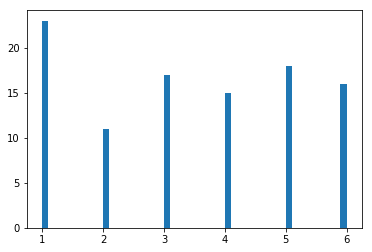

In [32]:
plt.hist(l, 50)
plt.show()

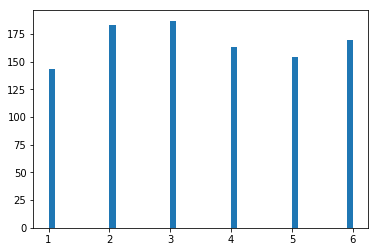

In [34]:
import random
l = []
for i in range(1000):
    l.append(random.randint(1, 6))
plt.hist(l, 50)
plt.show()

In [35]:
# Как видно, если взять больше наблюдений, то распределение стремится к равномерному (закон больших чисел). 

Комментарий от преподавателя:
    
Задание проверила, все хорошо сделано, и аккуратно оформлено.
Есть также дополнительные графики к некоторым заданиям, что очень радует.
По всем дополнительным вопросам все ок, ставлю зачет и
желаю дальнейших успехов в образовании!